# Built-in Dataset

-   파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공한다.
-   모든 built-in dataset은 [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현되있다.
    -   [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    -   [audio dataset](https://pytorch.org/audio/stable/datasets.html)
    -   [text dataset](https://pytorch.org/text/stable/datasets.html)


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Image Built-in dataset Loading

torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공한다.

-   각 Dataset 클래스의 주요 매개변수 (클래스들 마다 약간의 차이가 있다.)
    -   **root**: str
        -   Raw data를 저장할 디렉토리 경로
    -   **train**: bool
        -   True일경우 Train set을 False일 경우 Test set을 load
    -   **download**: bool
        -   True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
    -   **transform**: function
        -   Loading한 이미지를 변환하는 function.
            -   Normalization이나 data Agumentation 처리를 한다.


In [38]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [39]:
import os
mnist_data_dir = "datasets"
mnist_trainset = datasets.MNIST(
    root=mnist_data_dir, # raw data의 위치.
    download=True,       # root에 지정한 경로에 없을 경우 다운받을지 여부
    train=True,          # True: train set, False: test set
)

In [40]:
type(mnist_trainset), isinstance(mnist_trainset, Dataset)

(torchvision.datasets.mnist.MNIST, True)

In [41]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train

In [42]:
# Dataset의 총 데이터개수를 조회 - len()
len(mnist_trainset)

60000

In [43]:
# 개별 데이터를 조회 -> indexing
mnist_trainset[0]  # 개별데이터는 x(input)과 y(output)로 구성되어 tuple(x,  y)로 반환된다.

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [44]:
# 첫번째 데이터 조회
x0 = mnist_trainset[0]

# 첫번째 데이터 이미지 확인
# x0[0].show()
x0[0]

In [45]:
# 첫번째 데이터 label 확인
x0[1]

5

In [46]:
######################################################################
# Target class 값 조회
######################################################################
# class - class name
## class(class index): 인코딩 된 label의 클래스, class name: 실제 class의 이름.
mnist_trainset.class_to_idx
# dict: key-class name, value: class

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [47]:
# class name - class
# mnist_trainset.classes
mnist_trainset.classes[2]
# list: index-class(id), value-class name

'2 - two'

In [48]:
class MyCallable:

  def __call__(self, p1, p2, p3, *args):
    print("MyCallable.__call()실행됨.", p1, p2, p3, args)
    return 10

m2 = MyCallable()
# m.__call__()
m2(100, "a", 3.4, 'a', 'b', 'c') # __call__() 호출

MyCallable.__call()실행됨. 100 a 3.4 ('a', 'b', 'c')


10

In [49]:
# 전처리 transform 함수/callable객체
class MyTransform:

  def __call__(self, data):
    # data를 처리
    result = None # 처라결과
    return result

# datasets.MNIST(root="", train=True, transform=MyTransform())


## Dataset의 transform 매개변수를 이용한 데이터 전처리

- Dataset을 생성할 때, **원본 데이터를 제공하기 전 수행할 전처리 과정**을 함수(callable) 형태로 정의한다.
- 이 함수(callable)는 **입력 데이터 하나**를 매개변수로 받아, 전처리된 결과를 반환하도록 구현한다.
- transform 매개변수에는 데이터 파이프라인을 구성하는 함수나 callable 객체를 설정한다.

### torchvision에서 제공하는 주요 transform

- `torchvision.transforms.ToTensor`
  - PIL 이미지(PIL Image)나 넘파이 배열(NumPy ndarray)을 FloatTensor(float32 Tensor)로 변환한다.
  - 이미지 픽셀의 값(intensity)을 \[0., 1.\] 범위로 비례 조정한다.
  - 이미지의 형태(shape)를 (채널, 높이, 너비) 순서로 변경한다.
  - 자세한 내용은 [torchvision transforms 공식 문서](https://pytorch.org/vision/stable/transforms.html) 참고.

- `torchvision.transforms.Normalize`
  - 각 채널별로 지정된 평균(mean)을 빼고, 표준편차(standard deviation)로 나누어 정규화(normalization)를 수행한다.
  - `ToTensor()`로 변환된 데이터를 입력받아 추가 변환을 적용한다.

- `torchvision.transforms.Compose`
  - 여러 변환을 순차적으로 적용하고 싶을 때, `Compose` 클래스를 사용해 변환들을 하나로 묶는다.

In [50]:
mnist_trainset2 = datasets.MNIST(
    root=mnist_data_dir,
    download=True,
    train=True,
    transform=transforms.ToTensor()  # 전처리 callable 전달.
)

In [51]:
x0_2 = mnist_trainset2[0]

In [52]:
# ToTensor()의 전처리 작업.
print(x0_2[0].type())  # PIL.Image, np.ndarray -> pytorch Tensor 로 변환
print(x0_2[0].min(), x0_2[0].max()) # 0 ~ 1 사이로 scaling. (MinMaxScaling)
print(x0_2[0].shape) # channel first 로 shape을 변경. (channel, height, width)

torch.FloatTensor
tensor(0.) tensor(1.)
torch.Size([1, 28, 28])


In [53]:
# ToTensor() -> Normalize()
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)  # 모든 채널에 동일한 값을 적용: 상수., 채널별로 다른 값 적용: 리스트.
])

mnist_trainset3 = datasets.MNIST(
    root=mnist_data_dir,
    download=True,
    train=True,
    transform=transform
)

In [54]:
mnist_trainset3

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [55]:
x0 = mnist_trainset3[0][0]
x0.type()
x0.max(), x0.min()

(tensor(1.), tensor(-1.))

### TODO: CIFAR10 Dataset loading
- `datasets.CIFAR10` 이용
-   CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train dataset, test dataset의 데이터 개수 확인
    1. class index - class name 확인
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.


In [56]:
from torchvision import datasets

root_path = "datasets"
trainset = datasets.CIFAR10(
    root=root_path,
    train=True,
    download=True
)
testset = datasets.CIFAR10(
    root=root_path,
    train=False,
    download=True
)

In [57]:
print(trainset.classes.to_idx)
trainset.class_to_idx['cat']

AttributeError: 'list' object has no attribute 'to_idx'

In [ ]:
print(trainset.classes)
trainset.classes[5]

In [ ]:
index = 0
data = trainset[index]
print(data[1], trainset.classes[data[1]])
data[0]

In [ ]:
for index in range(5):
  data = trainset[index]
  print(data[1], trainset.classes[data[1]])
  data[0]

In [ ]:
from IPython.display import display

for index in range(5):
  data = trainset[index]
  print(data[1], trainset.classes[data[1]])
  display(data[0])

In [ ]:
# matplotlib

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
for index in range(20):
  plt.subplot(4, 5, index+1)
  data = trainset[index]  # tuple(x, y)
  plt.imshow(np.array(data[0]))
  plt.title(f"{data[1]} - {trainset.classes[data[1]]}")

plt.tight_layout()
plt.show()


In [ ]:
np.array(trainset[0][0]).shape

In [ ]:
r = transforms.ToTensor()(trainset[0][0])
print(type(r))
r.shape

## DataLoader 생성

-   DataLoader
    -   모델이 학습하거나 추론할 때 Dataset의 데이터를 batch size 개수단위로 모아서 모델에 제공한다.
    -   initalizer속성
        -   dataset: 값을 제공하는 Dataset 타입 객체
        -   batch_size: 한번에 값을 제공할 batch 크기
        -   shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        -   drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 제공할 지 여부(False-기본값, 제공한다. True: 제공하지 않는다.)


In [ ]:
from torch.utils.data import DataLoader

mnist_train_loader = DataLoader(mnist_trainset2, batch_size=1000, shuffle=True, drop_last=True)

In [ ]:
# step 수 조회
len(mnist_train_loader)

In [ ]:
for data in mnist_train_loader:
  print(type(data))
  print(data[0].shape, data[1].shape)
  break

In [ ]:
# Iterable(for in)타입 구현 - __iter__()
## 제공할 값들을 가지고 있거나 제공하는 알고리즘을 가지고 있는 객체
# Iterator 타입 구현 - __next__()
## Iterable의 값들(원소)를 제공하는 역할
class MyIterable:

  def __init__(self):
    self.values = [1, 100, 20, 300]
    self.index = 0

  def __iter__(self):
    # Iterator 객체를 반환하도록 구현
    return self

  def __next__(self):
    # Iterable이 가진 개별 원소를 순서데로 하나씩 제공하는 로직을 구현
    if self.index == len(self.values):
      raise StopIteration("더 이상 제공할 값이 없습니다.")

    return_value = self.values[self.index]
    self.index += 1
    return return_value

In [ ]:
mi = MyIterable()
# Iterablr에서 Iterator를 조회 -> iter(Iterable)
# Iterable = iter(mi.__iter__)
iterator = iter(mi)
# iterator에게 iterable의 다음값을 요청(조회) -> next(iterator)
v = next(iterator)
print(v)

In [ ]:
next(iterator)

In [ ]:
mi = MyIterable()

# 1. Iterator 생성
it = iter(mi)
while True:
  try:
    v = next(it)
    print(v)
  except StopIteration:
    break

In [ ]:
# subscriptable type -> indexing이 가능한 객체
class Mysubscriptable:

  def __init__(self):
    self.values = [1, 2, 3]

  def __len__(self):
    # 제공할 데이터의 총개수
    return len(self.values)

  def __getitem__(self, index):
    print("getitem - ", index)
    return self.values[index], index+100

In [ ]:
s = Mysubscriptable()
len(s)

In [ ]:
s[0]

# Custom Dataset 구현

사용자가 보유한 데이터를 이용하여 커스텀 Dataset을 생성할 수 있다.

## 구현 방법
1. `torch.utils.data.Dataset` 클래스를 상속하는 새로운 클래스를 정의한다.

2. `__init__(self, ...)`
   - Dataset 객체 생성 시 필요한 설정을 초기화한다.
   - 예를 들어, 데이터 저장 경로, transform 설정 여부 등을 초기화한다.

3. `__len__(self)`
   - 전체 데이터의 개수를 반환하도록 구현한다.
   - DataLoader가 배치를 생성할 때 이 정보를 사용한다.

4. `__getitem__(self, index)`
   - index에 해당하는 데이터 포인트를 반환한다.
   - 입력(input, X)과 출력(output, y)을 튜플 형태로 반환한다.
   - transform이 설정되어 있을 경우, 변환된 입력 데이터를 반환한다.


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## OxfordPet Dataset 생성

-   https://www.robots.ox.ac.uk/~vgg/data/pets/
-   개,고양이 37가지 품종
-   품종별로 200장 정도씩 구성됨. (품종별로 이미지 개수는 다르다)
-   목표
    -   train: 70%, validation: 20%, test: 10%


In [58]:
import os
import re
from glob import glob
import tarfile # tar 압축파일 다루는 모듈.
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [59]:
tar_file_path = '/content/drive/MyDrive/Colab Notebooks/images.tar.gz'  #압축파일 경로
dataset_path = "datasets/oxfordpet" # 압축을 풀 경로
pet_dataset_path = "datasets/oxfordpet/images" # 압축 풀린 이미지가 저장될 경로.

In [61]:
#############################
# tar 압축풀기
#############################

print(f"압축 파일 경로: {tar_file_path}")
!ls -al "{tar_file_path}"

with tarfile.open(tar_file_path) as tar: # 압축파일과 연결(open)
    tar.extractall(dataset_path)         # 압축풀 경로를 넣어서 풀기.

압축 파일 경로: /content/drive/MyDrive/Colab Notebooks/images.tar.gz
-rw------- 1 root root 964934011 May  9 06:39 '/content/drive/MyDrive/Colab Notebooks/images.tar.gz'


error: Error -3 while decompressing data: invalid literal/length code

In [28]:
##############################
#  이미지 파일들의 경로 조회
##############################
file_list = glob(pet_dataset_path+"/*.jpg")
file_list[:5], len(file_list)

([], 0)

In [29]:
##########################################################
#  jpg color(RGB) 이미지만 남기고 나머지 이미지파일들 삭제
##########################################################
remove_cnt = 0 # 몇장 지웠는지 확인용.
for file in file_list:
    # 이미지 연결(open)
    with Image.open(file) as img:
        img_mode = img.mode  # "RGB": rgb color, 'L': gray scale
    if img_mode != "RGB":
        #RGB 아닌 파일은 삭제
        os.remove(file)
        remove_cnt += 1
        print(f"삭제한 파일명: {os.path.basename(file)}")

In [ ]:
print("삭제한 이미지 개수:",remove_cnt)

In [ ]:
######################################
# 삭제 후후 이미지 파일 경로 목록을 갱신
######################################
file_list = glob(pet_dataset_path+"/*.jpg")
len(file_list)

### index_to_class, class_to_index 생성

-   **index**: class index 번호(0, 1, 2), **class**: class 이름 (dog, cat, ..)
-   **index_to_class**: class들을 가지는 리스트. index(0, 1, ..)로 class 조회
    -   index를 주면 class 이름을 반환
-   **class_to_index**: key: 클래스이름, value: index -> class이름 넣으면 index 반환
    -   class 이름을 주면 index를 반환
-   Oxford PET - 파일명이 class
    -   대문자로 시작: 고양이, 소문자로 시작: 개
    -   파일명: 품종\_번호.jpg


In [66]:
class_name_set = set() # class이름들을 담을 set(중복제거를 위해 set 이용)
for f in file_list:
    file_name = os.path.basename(f)            # 파일경로에서 파일명만 조회
    label = re.sub(r"_\d+.jpg", "", file_name) #american_pit_bull_terrier_100.jpg -> _100.jpg 를 제거
    class_name_set.add(label)

In [67]:
index_to_class = list(class_name_set)
index_to_class.sort()
index_to_class

[]

In [68]:
# {class name: class index}

class_to_index = {value : index for index, value in enumerate(index_to_class)}

In [69]:
###############################################################
# Train(70%)/Test(10%)/Validation(20%) dataset 분리
#   class 별로 위의 비율이 되도록 나눈다.
# ############################################################

# 클래스 별로 200 개 개수를 기준으로 7: 1: 2 의 비율로 나눴을 때 나누는 지점의 index를 조회
train_idx = int(200 * 0.7)
valid_idx = train_idx + int(200 * 0.2)
train_idx, valid_idx
# 0 ~ train_idx         : train set
# train_idx ~ valid_idx : valid set
# valid_idx ~           : test set

(140, 180)

In [70]:
# splitext(파일명) : 파일명과 확장자를 분리
os.path.splitext(os.path.basename(file_list[0])

SyntaxError: incomplete input (<ipython-input-70-28ee4a7a21ca>, line 2)

In [72]:
train_file_list = []
valid_file_list = []
test_file_list = []

cnt = 0               # class별 몇번째 파일인지를 저장할 변수.
previous_class = None # 이전 반복에서 처리한 파일의 class 이름.
file_list.sort()

for path in file_list:
    file_name = os.path.splitext(os.path.basename(path))[0]  # 확장자를 뺀 파일명 조회회
    class_name = re.sub(r"_\d+", "", file_name)              # 파일명에서 품종 class 추출

    if previous_class == class_name: # 이전처리 class와 현재처리 class가 같으면
        cnt += 1 # 동일한 클래스 처리: 처리 count를 1 증가
    else:
        cnt = 0  # 다른 클래스를 처리: 처리 count를 0으로 초기화

    if cnt <= train_idx: # train_file_list에 추가.   0 ~ 140-1
        train_file_list.append(path)
    elif cnt > train_idx and cnt <= valid_idx: # valide_file_list에 추가. 140 ~ 180-1
        valid_file_list.append(path)
    else: # test_file_list에 추가. 180-1 ~ 나머지.
        test_file_list.append(path)

    previous_class = class_name

In [73]:
print(train_file_list[0])
print(valid_file_list[0])
print(test_file_list[0])

IndexError: list index out of range

In [74]:
len(train_file_list), len(valid_file_list), len(test_file_list)

(0, 0, 0)

In [75]:
########################################
#  Dataset 클래스 구현
########################################
class OxfordPetDataset(Dataset):

    def __init__(self, file_list, class_to_index, index_to_class, transform=None):
        """
        Args:
            file_list(list) - 데이터셋에 들어갈 파일들의 경로를 가지는 리스트
            class_to_index(dict) - class name로 class index를 조회
            index_to_class(list) - class index로 class name을 조회
            transform(callable) - 반환할 Image(X)를 전처리하는 callable 객체.
        """
        self.file_list = file_list
        self.class_to_index = class_to_index
        self.index_to_class = index_to_class
        self.transform = transform

    def __len__(self):
        """총 데이터 개수"""
        return len(self.file_list)

    def __getitem__(self, index):
        """
        index의 개별 데이터를 반환. input, output 데이터를 묶어서 반환.

        Args:
            index(int) - 조회할 데이터포인트의 index

        Returns:
            tuple - (input, output)
        """
        ## input data (x)
        # 반환할 이미지 경로
        img_path = self.file_list[index]

        # 이미지 Loading 후 RGB 컬러모드로 변환.
        img = Image.open(img_path).convert('RGB')

        # Resize (모델 입력 크기에 맞춰준다.)
        img = img.resize((224, 224)) # 대부분 전처리기에 넣는다.

        if self.transform is not None: #  transform(전처리기)가 있다면 전처리
            img = self.transform(img)

        ## output (y)
        # 경로에서 파일명만 추출: _번호.jpg 제거.
        class_name = re.sub(r'_\d+.jpg', "", os.path.basename(img_path))
        # class name을 이용해 class index 조회
        class_index = self.class_to_index[class_name]

        return img, class_index

    def __str__(self):
        return f"[Oxford Pet Dataset]\n총데이터수: {len(self.file_list)}"

In [76]:
train_set = OxfordPetDataset(train_file_list, class_to_index, index_to_class)
len(train_set)

0

In [77]:
x, y = train_set[200]

IndexError: list index out of range

In [78]:
print(y)
x

NameError: name 'y' is not defined

In [79]:
##############################################
# Dataset 생성
##############################################
train_set2 = OxfordPetDataset(train_file_list, class_to_index, index_to_class, transforms.ToTensor())
valid_set2 = OxfordPetDataset(valid_file_list, class_to_index, index_to_class, transforms.ToTensor())
test_set2 = OxfordPetDataset(test_file_list, class_to_index, index_to_class, transforms.ToTensor())

In [80]:
##############################################
# DataLoader 생성
##############################################
train_loader = DataLoader(train_set2, batch_size=1000, shuffle=True, drop_last=True)
valid_loader = DataLoader(valid_set2, batch_size=1000)
test_loader = DataLoader(test_set2, batch_size=1000)

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [81]:
################################################################################
# 위의 전체 프로세스를 Dataset 에 모두 정의(데이터 로딩, 전처리, Dataset 생성)
################################################################################
import os
import re
from glob import glob
import tarfile
from PIL import Image

from torch.utils.data import Dataset


class OxfordPetDataset2(Dataset):

    def __init__(self, root, split, transform=None):
        """
        Args:
            root(str) - 모든 이미지가 저장된 디렉토리
            split(str) - train/valid/test Dataset중 어떤 dataset을 생성할 지.
            transfomr(callable) - 전처리 callable 객체
        """
        self.root = root  # 파일들이 저장된 root 디렉토리.
        self.split = split  # train / valid / test
        self.transform = transform
        # trainset, validation set 구분 기준 index
        self.train_idx = int(200 * 0.7) # trainset 기준 index
        self.val_idx = self.train_idx + int(200*0.2)

        # RGB 이미지 빼고 제거 + file_list 생성
        self.file_list = self._remove_not_rgb()
        self.file_list.sort()
        # index_to_class, class_to_index 생성
        self.index_to_class, self.class_to_index = self._create_class_index()
        # 파일 경로 목록 생성
        self.split_file_list = self._create_split_file_list(split)

    def __len__(self):
        return len(self.split_file_list)

    def __getitem__(self, index):
        path = self.split_file_list[index]
        # x - input
        img = Image.open(path).convert('RGB')
        img = img.resize((224, 224)) # Transform에서 처리.

        if self.transform is not None:
            img = self.transform(img)
        # y - output
        class_name = re.sub(r"_\d+\.jpg", "", os.path.basename(path))
        class_index = self.class_to_index[class_name]
        return img, class_index

    def __str__(self):
        return f"OxfordPet Dataset\nSplit: {self.split}\n총데이터수: {self.__len__()}"

    def _create_split_file_list(self, split):
        """
        split(train/valid/test) 별 파일 경로 list 반환
        Args
            split(str) train/valid/test
        Returns
            list: 파일 경로 List
        """
        split_file_list = []
        cnt = 0
        previous_class = None
        for path in self.file_list:
            file_name = os.path.splitext(os.path.basename(path))[0]  # 디렉토리 빼고 확장자 빼고 파일명만 추출
            class_name = re.sub(r"_\d+", "", file_name)
            if previous_class == class_name:
                cnt += 1
            else:
                cnt = 1

            if split=="train":
                if cnt <= self.train_idx:
                    split_file_list.append(path)
            elif split=="valid":
                if cnt > self.train_idx and cnt <= self.val_idx:
                    split_file_list.append(path)
            elif split=="test":
                if cnt > self.val_idx:
                    split_file_list.append(path)
            else:
                raise Exception(f"split은 train/valid/test 중 하나를 입력하세요.")

            previous_class = class_name

        return split_file_list


    def _create_class_index(self):
        """
        index: class index, class: class_name
        파일명 label을 이용해 index_to_class 리스트, class_to_index dictionary 생성

        Returns
            tuple - index_to_class, class_to_index
        """
        class_name_set = set()  # 빈 set. 여기에 파일명들을 저장. -> 중복 제거를 위해서 set사용.
        for file in self.file_list:
            file_name = os.path.basename(file)       # Beagle_32.jpg
            label = re.sub(r'_\d+.jpg', "", file_name)  # Beagle
            class_name_set.add(label)
        index_to_class = list(class_name_set)
        index_to_class.sort()   # [A, B, C, ..]  # 리스트 index: class index, value: class Name
        class_to_index = {value:index for index, value in enumerate(index_to_class)}
        return index_to_class, class_to_index


    def _remove_not_rgb(self):
        """
        데이터파일에서 RGB 를 제외한 이미지 제거
        """
        file_list = glob(os.path.join(self.root, "*.jpg"))
        for file in file_list:
            # 이미지파일과 연결
            with Image.open(file) as img:
                image_mode = img.mode # "RGB", "L": grayscale,

            if image_mode != "RGB": # RGB 가 아닌 파일은 제거
                os.remove(file)

        return glob(os.path.join(self.root, "*.jpg"))  # 파일목록 리턴

In [82]:
root = "datasets/oxfordpet/images/"
trainset = OxfordPetDataset2(root, "train")
validset = OxfordPetDataset2(root, "valid")
testset = OxfordPetDataset2(root, "test")

0


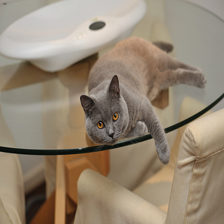

In [83]:
x, y = trainset[0]
print(y)
x

# 메모리상의 Tensor, ndarray 타입의 데이터를 이용해 Dataset생성
이미 loading된 데이터셋을 Dataset으로 생성
-   torch.utils.data.TensorDataset 이용
-   parameter
    -   input: Tensor
    -   output: Tensor


In [84]:
import pandas as pd
iris = pd.read_csv("data/iris.data",
                   header=None,
                   names=["sepal length", "sepal width", "petal lenth", "petal width", "label"])
iris.shape

FileNotFoundError: [Errno 2] No such file or directory: 'data/iris.data'

In [ ]:
iris.head()

In [ ]:
X = iris.drop(columns='label').values
y = iris['label'].values

In [ ]:
# y값을 label encoding
from sklearn.preprocessing import LabelEncoder
y_le = LabelEncoder()
y = y_le.fit_transform(y)
y[:5]

In [ ]:
# train/test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [ ]:
from torch.utils.data import TensorDataset
# (X, y) : X/y는 Tensor 타입
trainset = TensorDataset(
    torch.tensor(X_train), # input
    torch.tensor(y_train), # output
)
testset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

In [ ]:
trainset[0]

In [ ]:
y_le.classes_

# 모델 성능 평가를 위한 데이터셋 분리

-   **Train 데이터셋 (훈련/학습 데이터셋)**
    -   모델을 학습시킬 때 사용할 데이터셋.
-   **Validation 데이터셋 (검증 데이터셋)**
    -   모델의 성능 중간 검증을 위한 데이터셋
-   **Test 데이터셋 (평가 데이터셋)**
    -   모델의 성능을 최종적으로 측정하기 위한 데이터셋
    -   **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용한다.**

## 검증(validation), 평가(test) 데이터셋을 나누는 이유

-   모델을 훈련하고 성능 검증했을 때 원하는 성능이 나오지 않으면 모델의 여러 설정(하이퍼파라미터)들을 수정한 뒤에 다시 훈련시키고 검증을 하게 된다. 그리고 원하는 성능이 나올때 까지 설정변경->훈련->검증을 반복하게 된다. 이 작업이 **모델링(Modeling)** 이다.
-   위 사이클을 반복하게 되면 검증 결과를 바탕으로 설정을 변경하게 되므로 검증 할 때 사용한 데이터셋(Test set)에 모델이 맞춰서 훈련하는 것과 동일한 효과를 내게 된다.(설정을 변경하는 이유가 Test set에 대한 결과를 좋게 만들기 위해 변경하므로) 그래서 Train dataset과 Test dataset 두 개의 데이터셋만 사용하게 되면 **모델의 성능을 제대로 평가할 수 없게 된다.** 그래서 데이터셋을 train set, validation set, test set으로 나눠 train set 와 validation set을 사용해 훈련과 검증을 해 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

> -   **(Parameter)머신러닝 모델 파라미터**
>     -   성능에 영향을 주는 값으로 최적화의야 하는 대상내는 값을 찾아야 한다.
>         -   **하이퍼파라미터(Hyper Parameter)**
>             -   사람이 직접 설정해야하는 파라미터 값으로 주로 어떻게 모델을 학습시킬지에 대한 모델설정 값이다.
>             -   딥러닝에서는 학습률, Epoch수, batch size, optimizer, loss 함수 등 다양한 하이퍼파라미터가 있다.
>         -   **파라미터(Parameter)**
>             -   모델의 함수를 데이터에 맞추기 위한 값으로 학습을 통해 찾는 변수.
>             -   딥러닝 모델에서는 weight와 bias 가 파라미터다.


## Dataset 분리

### torch.utils.data.Subset을 이용

-   Dataset의 일부를 가지는 부분집합 데이터셋을 생성
-   주로 사용하는 곳
    1. 데이터 셋을 분리
    2. 전체 데이터 셋에서 일부 데이터를 추출 할 때
    3. 데이터셋에서 특정 데이터만 골라서 추출할 때 (ex: 특정 class만 추출하는 경우)


In [ ]:
import torch
from torch.utils.data import TensorDataset, Subset

In [ ]:
inputs = torch.arange(1, 11).reshape(5, 2)
outputs = torch.arange(5).reshape(5, 1)
inputs.shape, outputs.shape

In [ ]:
dataset = TensorDataset(inputs, outputs)
len(dataset)

In [85]:
# dataset의 5개중에 3개를 골라서 Subset 생성.
sub1 = Subset(dataset, [1, 2, 4])   # (가져올Dataset, 가져올 index들)
sub2 = Subset(dataset, [0, 3])
len(sub1), len(sub2)

NameError: name 'Subset' is not defined

In [86]:
for i in sub1:
    print(i)

NameError: name 'sub1' is not defined

In [87]:
for i in sub2:
    print(i)

NameError: name 'sub2' is not defined

In [88]:
inputs

NameError: name 'inputs' is not defined

In [89]:
from torchvision import datasets
trainset = datasets.MNIST("datasets", train=True, download=True)
len(trainset)

60000

In [90]:
all_index = torch.randperm(len(trainset)) # 0 ~ 지정한정수: 섞어서 반환.
train_index = all_index[:50000]  # 50000, 10000
valid_index = all_index[50000:]

In [91]:
m_trainset2 = Subset(trainset, train_index)
m_valid2 = Subset(trainset, valid_index)
len(m_trainset2), len(m_valid2)

NameError: name 'Subset' is not defined

### random_split() 함수 이용

-   Dataset객체와 나눌 데이터셋들의 원소 개수를 리스트로 묶어서 전달하면 Shuffle후 나눈 뒤 그 결과를 Subset객체들을 리스트에 담아 반환한다.


In [ ]:
from torch.utils.data import random_split
sub1, sub2, sub3 = random_split(
     trainset, # 나눌대상  Dataset
     [40000, 10000, 10000], # [몇개씩으로 나눌지 개수]
)

In [92]:
len(sub1), len(sub2), len(sub3)

NameError: name 'sub1' is not defined